# Validation of Godt and others (2008)

In this section, we demonstrate that our implementation of the Godt and others (2008) model yields the same output as results reported in the original paper. There may be slight differences due to different shakemap versions or minor differences in the exact colorbars used.


## Wenchuan earthquake



In [57]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib

#local imports
from gfail.godt import godt2008
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

homedir = os.path.join(os.path.expanduser('~'), 'SecondaryHazards') 


# Set up file paths
# Directory containing model inputs
datadir = os.path.join(homedir, 'Codes/model_inputs') #'data/model_inputs'

# Path to config files
configfileZ2 = '../defaultconfigfiles/models/godt_2008.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/wenchuan.xml'

# Path to mapping inputs for static plots
map_inputs = os.path.join(homedir, 'Codes/mapping_inputs')#'data/mapping_inputs'

In [58]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

In [59]:
bounds = dict(xmin=102., xmax=106., ymin=30., ymax=33.2)

# Run the model (this will take a minute)
maplayers = godt2008(shakefile, config, saveinputs=False, bounds=bounds)

### Change bins to match figure from paper


In [88]:
lims = [[0., 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 1.]]
colorlist = ['#108CFA','#0DCFFD', '#D146FC', '#66F72C', '#FEFA34', '#FFB729', '#FE2B19']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(colorlist) #'#FFFFFF', 
colormap = [CustomCmap]

maskthresh = [0.01]  # to represent gray color on figure

0.0

### Create the figure

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed


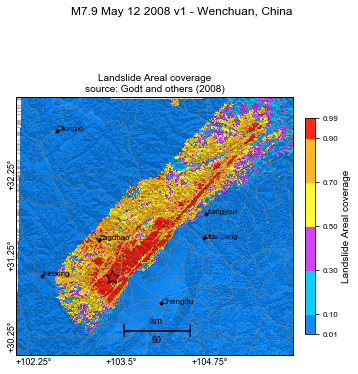

In [87]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/godt2008_wenchuan.png" alt="From Paper" style="width: 500px;" align="left"/>

## Northridge

In [82]:
# Path to shakemap .xml files
shakefile2 = 'data/shakemaps/northridge.xml'
bounds2 = dict(xmin=-119.1, xmax=-118., ymin=34., ymax=34.7)

# Run the model (this will take a minute)
maplayers2 = godt2008(shakefile2, config, saveinputs=False, bounds=bounds2)

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed


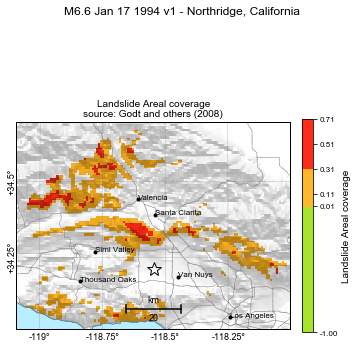

In [96]:
lims2 = [[0., 0.011, 0.11, 0.31, 0.51, 0.71]]
colorlist2 = ['#108CF9','#A6E42C', '#FEFA34', '#FFB729', '#FE2B19']  #hex code for colors in figure below
CustomCmap2 = matplotlib.colors.ListedColormap(colorlist2) #'#FFFFFF', 
colormap2 = [CustomCmap2]

maskthresh = [0.009]  # to represent gray color on figure

# Make the figure
temp = makemaps.modelMap(maplayers2, shakefile2, lims=lims2, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds2,
         colormaps=colormap2, **kwargs)

In [94]:
np.max(maplayers2['model']['grid'].getData())

0.7

### Compare to the result from the original paper for this event (below)
<img src="data/images/godt2008_northridge.png" alt="From Paper" style="width: 500px;" align="left"/>